# Analisis de varianza
## Estudio de los álamos
#### ANOVA 1 solo factor
+ El conjunto de datos incluye los pesos (en kilogramos) de álamos que recibieron distintos tratamientos en terrenos diferentes.
+ Sólo consideraremos los pesos del año 1 en el terreno 1, el cual tiene un suelo fértil y húmedo, y se localiza cerca de un arroyo. 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Especifica la ruta del archivo Excel
archivo = '../../data/AlamosWeights.xlsx'  # Cambia esto por la ruta real de tu archivo

# Carga el archivo Excel en un DataFrame
df = pd.read_excel(archivo, sheet_name='PesoAlamos')  # Cambia 'Hoja1' según el nombre de tu hoja
df1=  df[(df.Años == 1) & (df.Lugar =='Fertil-Húmedo')]
df1


,Años,Lugar,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
0,1,Fertil-Húmedo,0.15,1.34,0.23,2.03
1,1,Fertil-Húmedo,0.02,0.14,0.04,0.27
2,1,Fertil-Húmedo,0.16,0.02,0.34,0.92
3,1,Fertil-Húmedo,0.22,0.08,0.05,2.38
4,1,Fertil-Húmedo,0.37,0.08,0.16,1.07


Con la intención de explorar los datos para investigar el centro, la variación, la distribución, los valores extremos y los patrones de cambio a través del tiempo (CVDVT), 
+ comenzamos calculando los estadísticos muestrales.

In [40]:
df1.describe()

,Años,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
count,5.0,5.000000,5.000000,5.000000,5.000000
mean,1.0,0.184000,0.332000,0.164000,1.334000
std,0.0,0.127004,0.565084,0.126214,0.859029
min,1.0,0.020000,0.020000,0.040000,0.270000
25%,1.0,0.150000,0.080000,0.050000,0.920000
50%,1.0,0.160000,0.080000,0.160000,1.070000
75%,1.0,0.220000,0.140000,0.230000,2.030000
max,1.0,0.370000,1.340000,0.340000,2.380000


+ Al examinar las medias muestrales, vemos que parecen variar mucho, desde 0.164 kg hasta 1.334 kg. 
+ Además, las desviaciones estándar de las muestras varían considerablemente, desde 0.126 kg hasta 0.859 kg. 

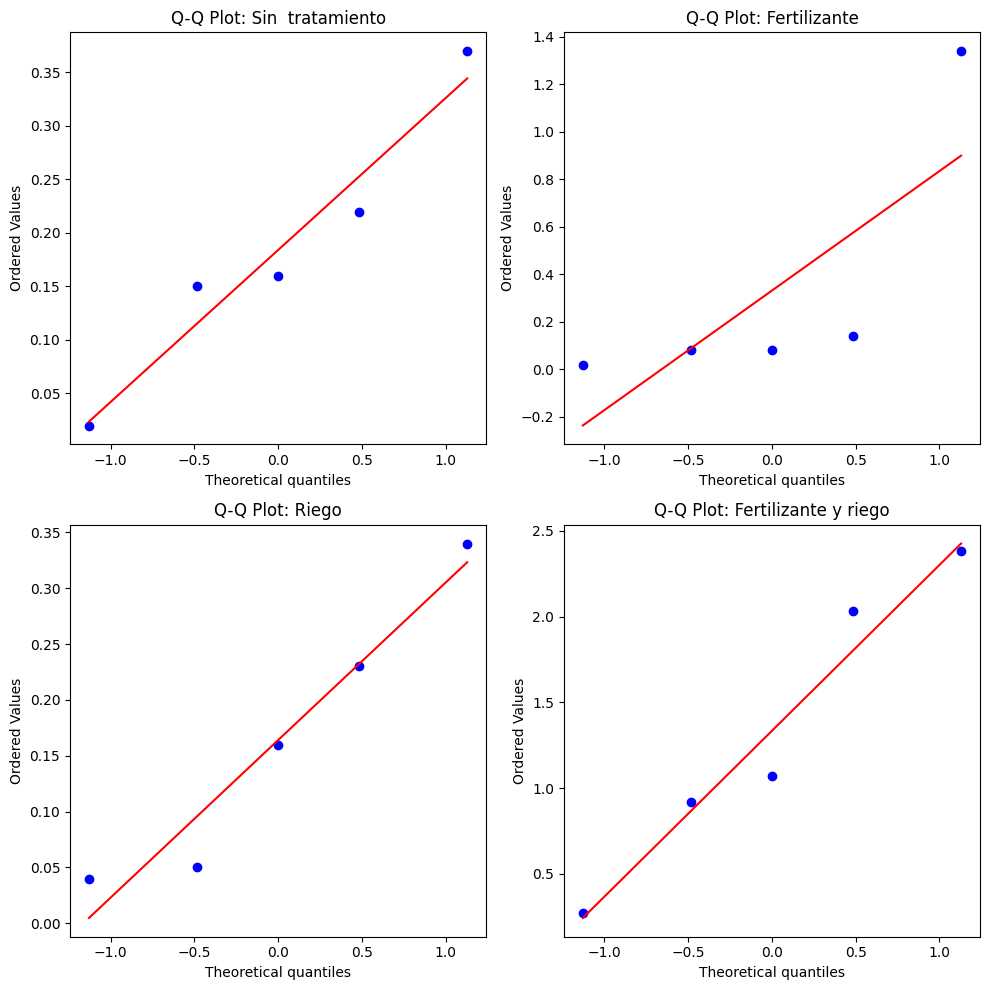

In [41]:
# Graficos de cada escenario
fig, axs = plt.subplots(2, 2, figsize=(10, 10)) # Crear subplots para las gráficas Q-Q
scene = df1.columns[2:]                         # A cada subplot lo llamaremos escenario

# Generar Q-Q plots
for i, col in enumerate(scene):
    ax = axs[i//2, i%2]
    stats.probplot(df1[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {col}')

# Ajustar el layout
plt.tight_layout()
plt.show()

+ Es difícil analizar las distribuciones porque cada muestra consiste únicamente en 5 valores, 
    + pero las gráficas cuantilares normales sugieren que tres de las muestras provienen de poblaciones con distribuciones aproximadamente normales. 
+ Sin embargo, el análisis de los pesos de los álamos que recibieron tratamiento con fertilizantes sugiere que el peso de 1.34 kg es un valor extremo 
    + cuando se compara con los otros pesos de los árboles fertilizados. 
+ Con un solo valor extremo, procederemos bajo el supuesto de que las muestras provienen de poblaciones con distribuciones aproximadamente normales.            
    + Podríamos realizar análisis adicionales posteriormente para determinar si el peso de 1.34 kg tiene un fuerte efecto en los resultados.
    + Pero por el momento asumimos que no hay un fuerte efecto en este caso.
+ Parece que las diferencias entre las medias muestrales indican que las muestras provienen de poblaciones con medias diferentes, 
    + pero en vez de considerar únicamente las medias muestrales, también debemos considerar
        + las cantidades de variación, 
        + los tamaños muestrales y 
        + la naturaleza de la distribución de las medias muestrales. 
+ Una forma de tomar en cuenta todos estos factores importantes consiste en realizar una prueba formal de hipótesis que los incluya de manera automática. 
+ Entonces sabremos si los distintos tratamientos tienen algún efecto.


#### ANOVA 
+ Probar si los distintos tratamientos tienen algún efecto significa probar que las cuatro muestras provienen de escenario significativamente diferentes.
+ Para probar la aseveración de que las cuatro muestras provienen de poblaciones con medias realmente diferentes, podemos realizar un análisis de varianza (ANOVA). 
+ Este método estadístico se usa para comparar las medias de más de dos grupos y verificar si existen diferencias significativas entre ellas.

In [44]:
# Realizar ANOVA
f_stat, p_value = stats.f_oneway(df1['Sin  tratamiento'], df1['Fertilizante'], df1['Riego'], df1['Fertilizante y riego'])

# Resultados
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

# Evaluación del valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las medias de los tratamientos son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que las medias de los tratamientos son diferentes.")

Estadístico F: 5.731352874755579
Valor p: 0.007348294418256392
Se rechaza la hipótesis nula. Las medias de los tratamientos son significativamente diferentes.


##### Visualización de los resultados

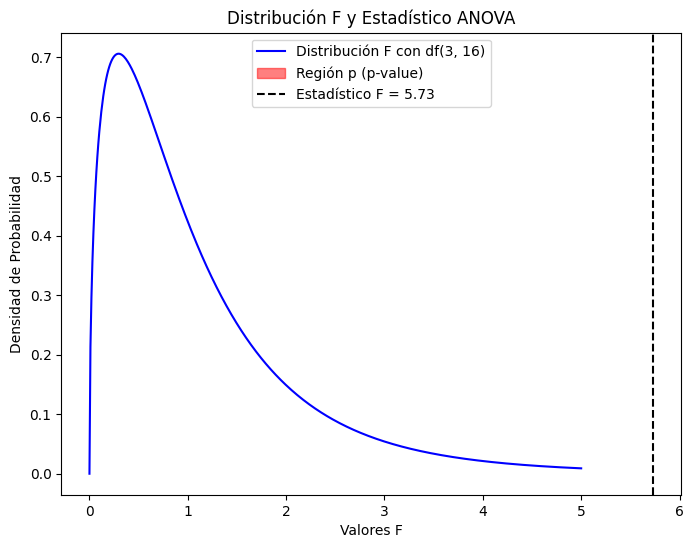

Estadístico F: 5.731352874755579
Valor p: 0.007348294418256392


In [46]:
# Grados de libertad (df)
df_between = len(data) - 1   # Grupos - 1
df_within = sum(len(v) for v in data.values()) - len(data)  # Total de muestras - grupos

# Crear un rango de valores F para la distribución
f_values = np.linspace(0, 5, 500)
f_dist = f.pdf(f_values, df_between, df_within)  # Distribución F

# Graficar la distribución F
plt.figure(figsize=(8, 6))
plt.plot(f_values, f_dist, 'b-', label=f'Distribución F con df({df_between}, {df_within})')

# Sombrear la región correspondiente al valor p (cola derecha)
plt.fill_between(f_values, 0, f_dist, where=(f_values >= f_stat), color='red', alpha=0.5, label=f'Región p (p-value)')

# Línea vertical para el estadístico F calculado
plt.axvline(f_stat, color='black', linestyle='--', label=f'Estadístico F = {f_stat:.2f}')

# Añadir títulos y leyenda
plt.title('Distribución F y Estadístico ANOVA')
plt.xlabel('Valores F')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='best')

# Mostrar gráfico
plt.show()

# Mostrar resultados
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')
